# ***SmartCart Clustering System Project***

### ***Import Libraries***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('./Datasets/smartcart_customers.csv')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


# Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

***There are some mising values in Income Column so now we will handle it***              

In [6]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [7]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
dtype: int64

## Feature Engineering 

In [8]:
df['Age']= 2026 - df['Year_Birth']

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],dayfirst=True)
reference_date = pd.to_datetime('2026-12-31')
df['Customer_tenure_days'] = (reference_date - df['Dt_Customer']).dt.days


In [9]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_tenure_days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,88,3,8,10,4,7,0,1,69,5231
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,6,2,1,1,2,5,0,0,72,4681
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,42,1,8,2,10,4,0,0,61,4880
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,5,2,2,0,4,6,0,0,42,4707
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,15,5,5,3,6,5,0,0,45,4729


In [10]:
# Spending 
df['Total_Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [11]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [12]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_tenure_days,Total_Spending,Total_Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,8,10,4,7,0,1,69,5231,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,1,2,5,0,0,72,4681,27,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,8,2,10,4,0,0,61,4880,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,2,0,4,6,0,0,42,4707,53,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,3,6,5,0,0,45,4729,422,1


In [13]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [14]:
df['Education'] = df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Graduate','Master':'Postgraduate','PhD':'Postgraduate'})
df['Education'].value_counts()

Education
Graduate         1127
Postgraduate      856
Undergraduate     257
Name: count, dtype: int64

In [15]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [16]:
df['Marital_Status'] = df['Marital_Status'].replace({'Married':'Couple','Together':'Couple','Single':'Single','Divorced':'Single','Widow':'Single','Alone':'Single','Absurd':'Single','YOLO':'Single'})
df['Marital_Status'].value_counts()

Marital_Status
Couple    1444
Single     796
Name: count, dtype: int64

# Drop Columns

In [17]:
df.shape

(2240, 26)

In [18]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Age', 'Customer_tenure_days', 'Total_Spending',
       'Total_Children'],
      dtype='object')

In [19]:
col = ['ID','Year_Birth','Kidhome','Teenhome','Dt_Customer','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df = df.drop(columns=col)

In [20]:
df.shape

(2240, 15)

In [21]:
df.head()

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_tenure_days,Total_Spending,Total_Children
0,Graduate,Single,58138.0,58,3,8,10,4,7,0,1,69,5231,1617,0
1,Graduate,Single,46344.0,38,2,1,1,2,5,0,0,72,4681,27,2
2,Graduate,Couple,71613.0,26,1,8,2,10,4,0,0,61,4880,776,0
3,Graduate,Couple,26646.0,26,2,2,0,4,6,0,0,42,4707,53,1
4,Postgraduate,Couple,58293.0,94,5,5,3,6,5,0,0,45,4729,422,1


# ***Outlier***

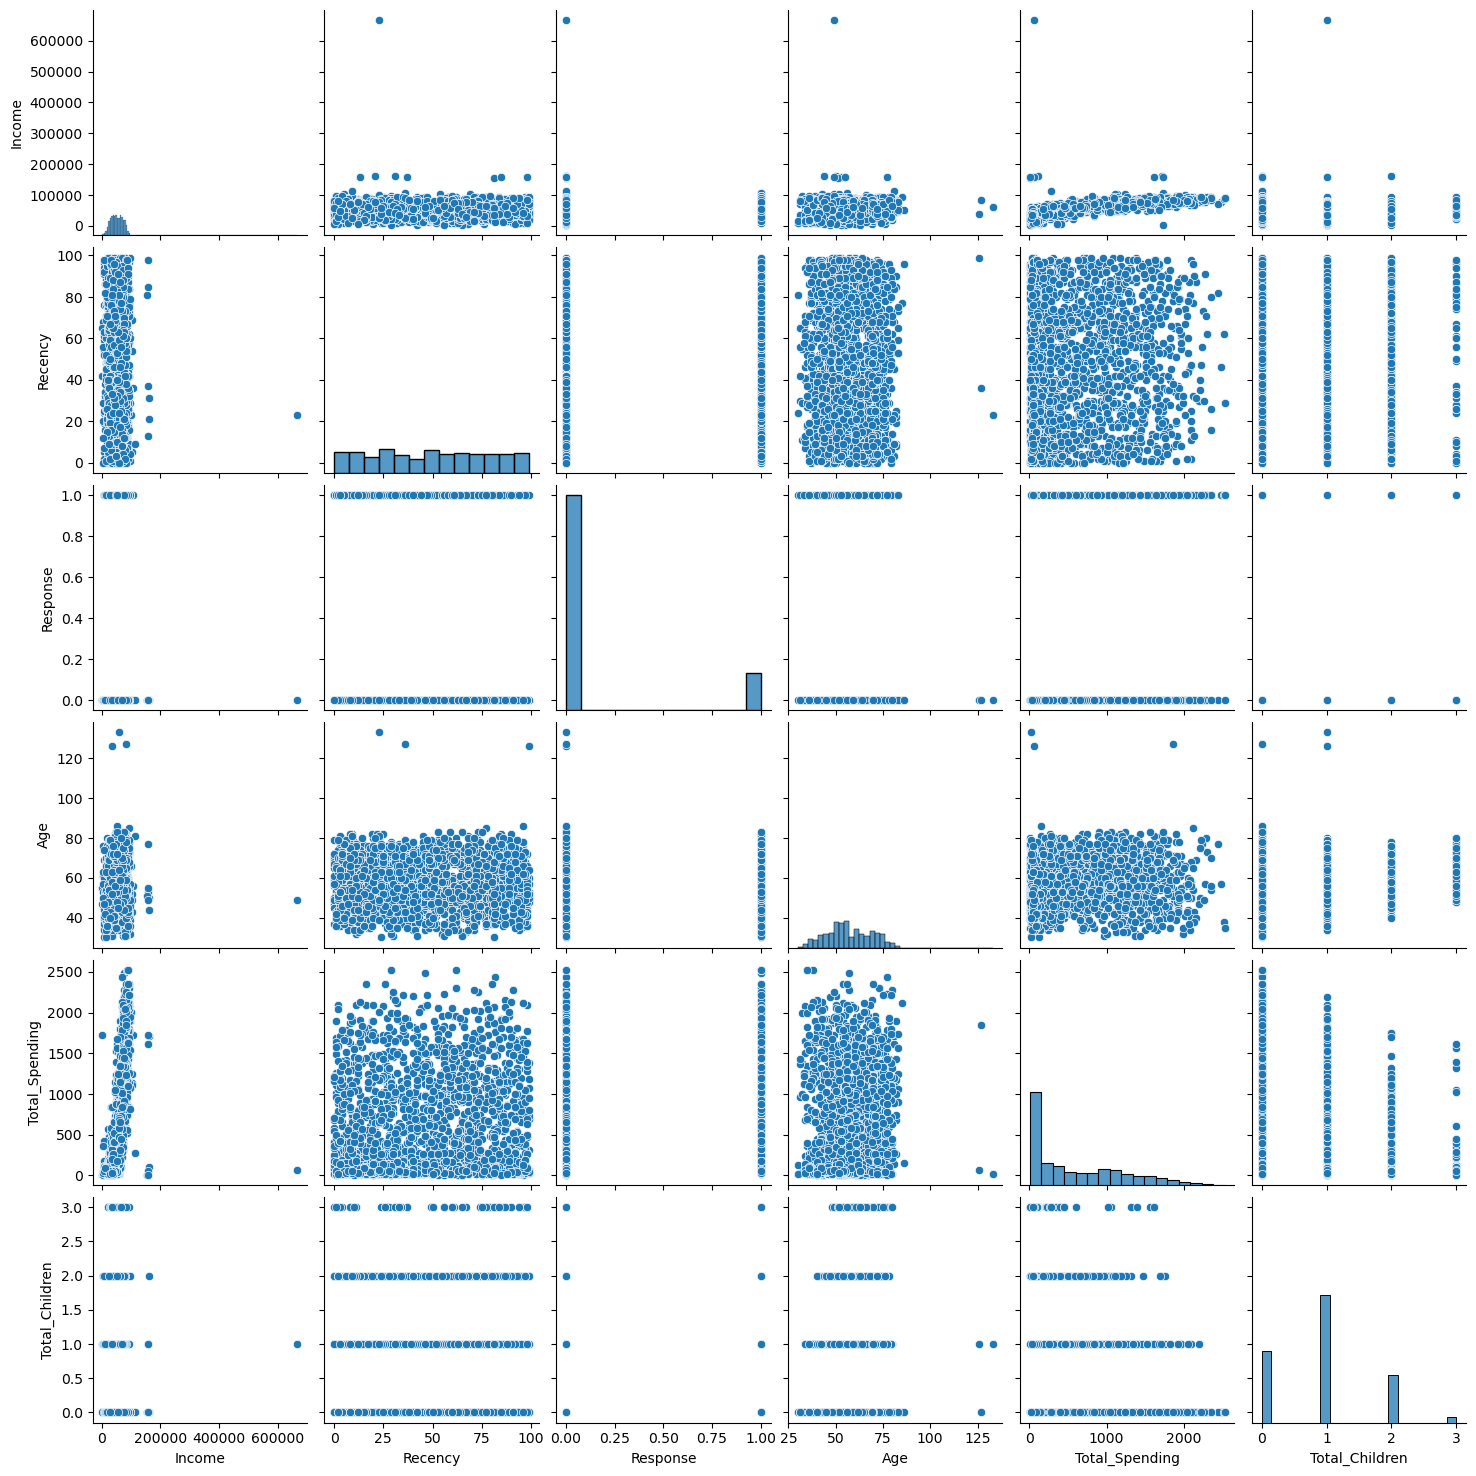

In [22]:
cols = ['Income','Recency','Response','Age','Total_Spending','Total_Children']
sns.pairplot(df[cols])

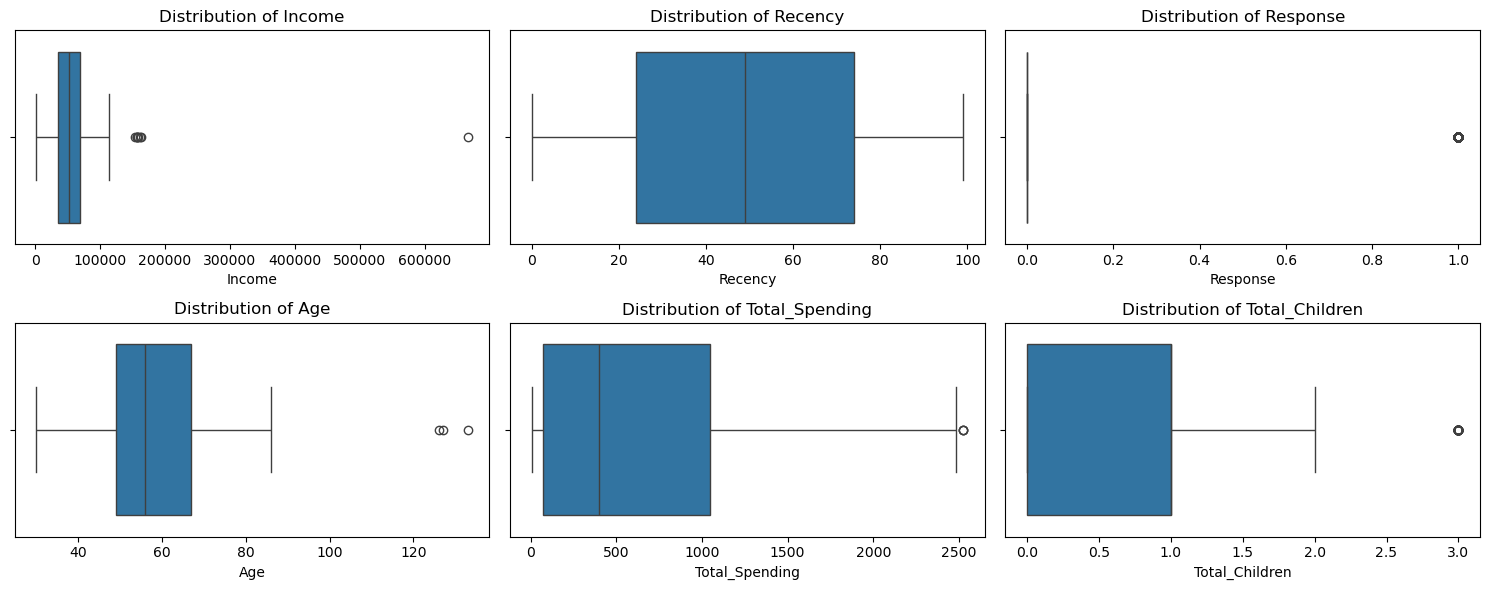

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(15, 6))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [24]:
df = df[df['Age'] < 90]
df = df[df['Income'] < 600000]

# ***Heatmap***

In [25]:
corr = df.corr(numeric_only=True)


<Axes: >

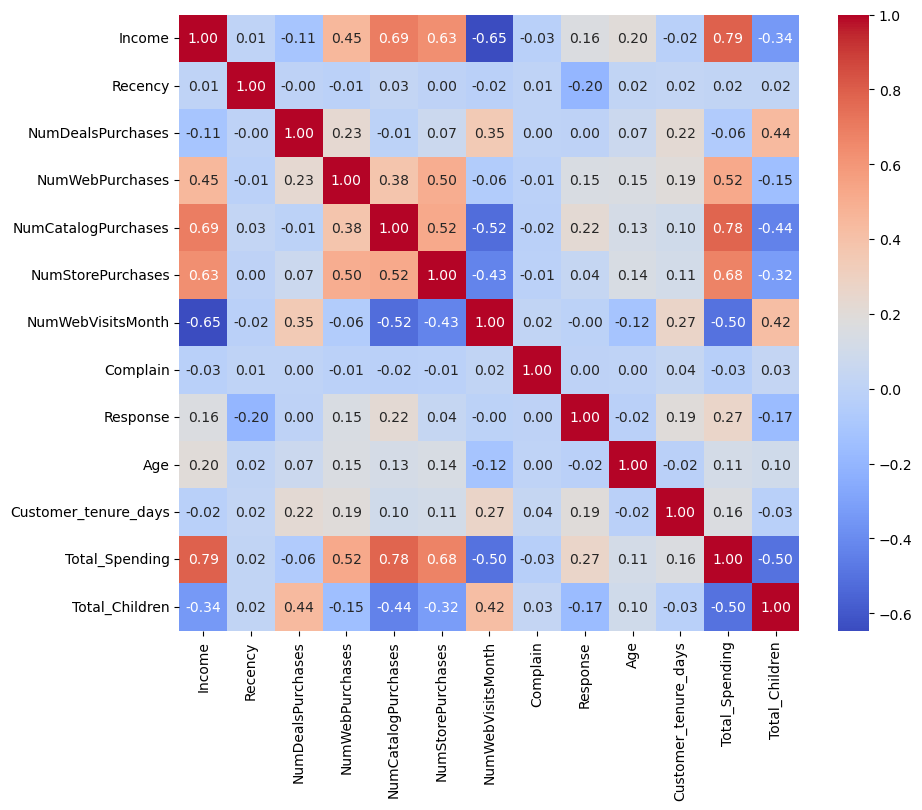

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

# Feature Encoding

In [27]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [28]:
ohe = OneHotEncoder()
cat_cols = ['Education','Marital_Status']
encoded_cols = ohe.fit_transform(df[cat_cols]).toarray()

In [29]:
df = pd.concat([df.drop(columns=cat_cols), pd.DataFrame(encoded_cols, columns=ohe.get_feature_names_out(cat_cols),index=df.index)], axis=1)

In [30]:
df.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_tenure_days,Total_Spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Couple,Marital_Status_Single
0,58138.0,58,3,8,10,4,7,0,1,69,5231,1617,0,1.0,0.0,0.0,0.0,1.0
1,46344.0,38,2,1,1,2,5,0,0,72,4681,27,2,1.0,0.0,0.0,0.0,1.0
2,71613.0,26,1,8,2,10,4,0,0,61,4880,776,0,1.0,0.0,0.0,1.0,0.0
3,26646.0,26,2,2,0,4,6,0,0,42,4707,53,1,1.0,0.0,0.0,1.0,0.0
4,58293.0,94,5,5,3,6,5,0,0,45,4729,422,1,0.0,1.0,0.0,1.0,0.0


# Scaling The Data

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
X = df

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualize The Data

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca= PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_

array([0.23163158, 0.11385454, 0.10405815])

In [36]:
import plotly.express as px
fig = px.scatter_3d(x=X_pca[:,0], y=X_pca[:,1],z=X_pca[:,2])
fig.show()

# Analyze K Value

***1- Elbow Method***

In [37]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

c:\Users\Abid\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\Abid\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Abid\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Abid\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Abid\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, arg

In [38]:
knee = KneeLocator(range(1,11),wcss, curve='convex', direction='decreasing')
optimal_k = knee.elbow
print(f'Optimal number of clusters: {optimal_k}')

Optimal number of clusters: 4


Text(0.5, 1.0, 'Elbow Method for Optimal k')

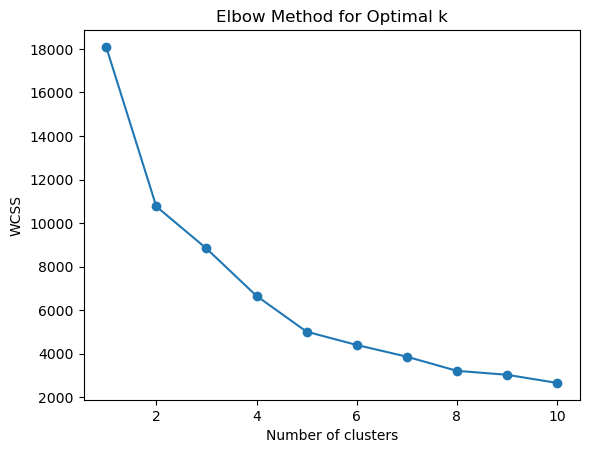

In [39]:
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')

***2. Silhoute Score***

Text(0.5, 1.0, 'Silhouette Scores for Different k')

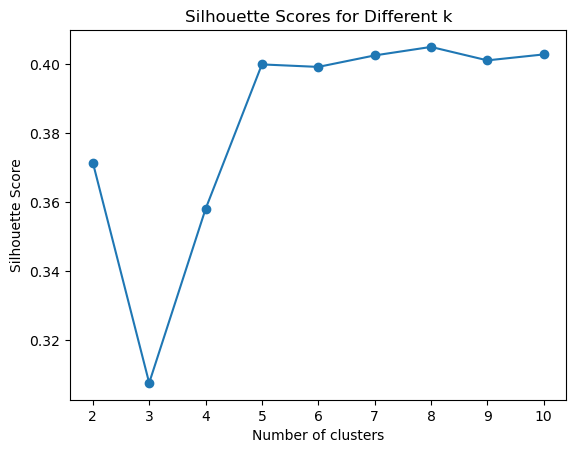

In [40]:
from sklearn.metrics import silhouette_score
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    scores.append(score)
plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')    

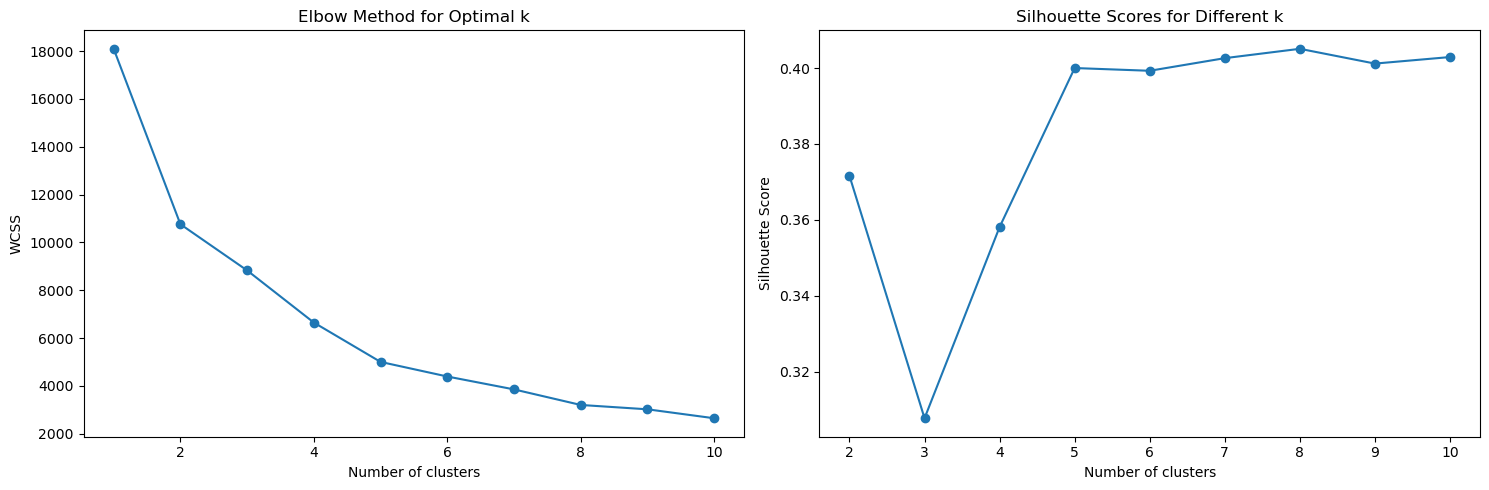

In [41]:
# combined plot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(range(1, 11), wcss, marker='o')
axes[0].set_xlabel('Number of clusters')
axes[0].set_ylabel('WCSS')
axes[0].set_title('Elbow Method for Optimal k')
axes[1].plot(range(2, 11), scores, marker='o')
axes[1].set_xlabel('Number of clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Scores for Different k')
plt.tight_layout()

Text(0.5, 1.0, 'WCSS and Silhouette Scores for Different k')

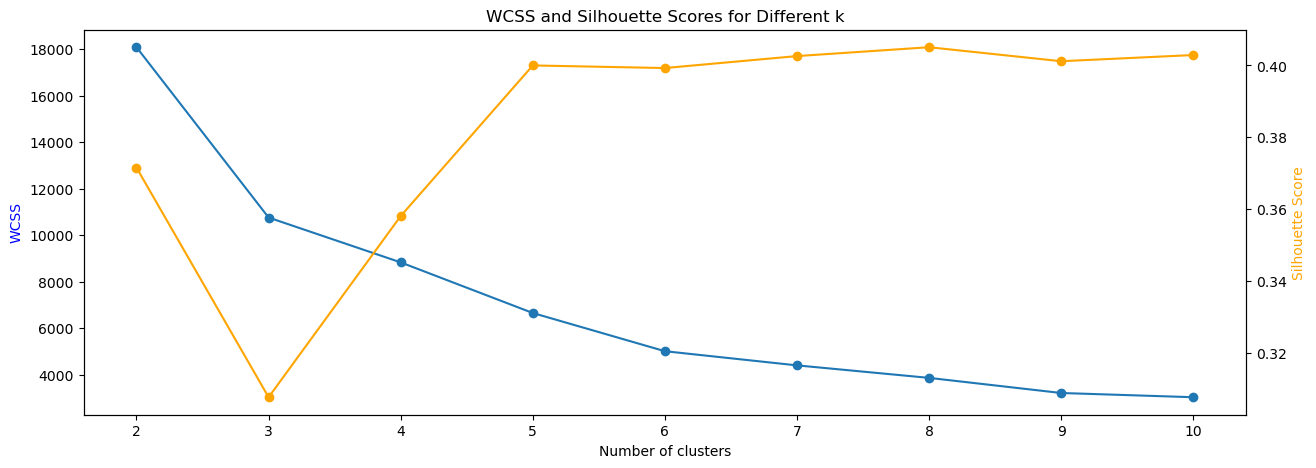

In [43]:
fig, ax1 = plt.subplots(figsize=(15, 5))
ax1.plot(range(2, 11), wcss[:len(range(2,11))], marker='o')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS', color='blue')

ax2 = ax1.twinx()
ax2.plot(range(2, 11), scores, marker='o', color='orange')
ax2.set_ylabel('Silhouette Score', color='orange')
plt.title('WCSS and Silhouette Scores for Different k')

# ***Clustering***

In [44]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_pca)

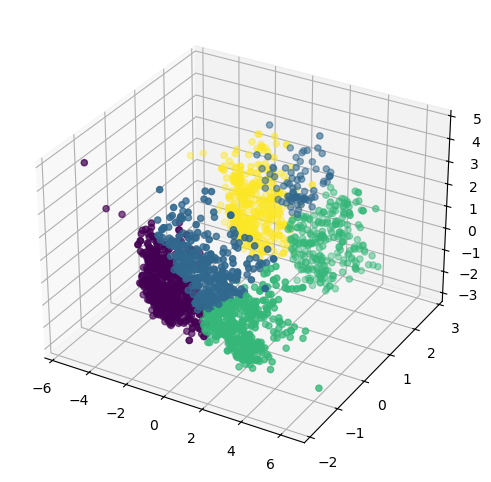

In [46]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111, projection="3d")

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels)

In [47]:
from sklearn.cluster import AgglomerativeClustering

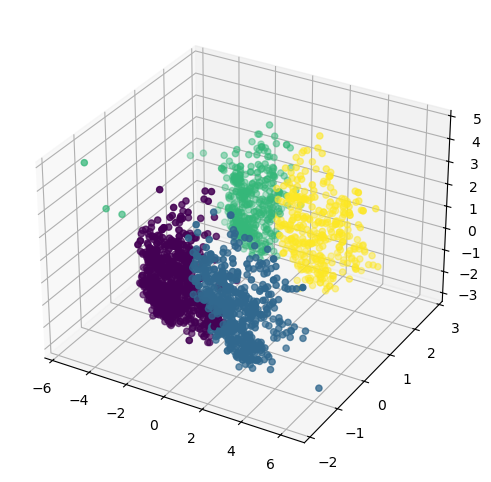

In [48]:
agg_clf = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clf.fit_predict(X_pca)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=agg_labels)

# Characterization of Clusters

In [49]:
X["cluster"] = agg_labels
X.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_tenure_days,Total_Spending,Total_Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Couple,Marital_Status_Single,cluster
0,58138.0,58,3,8,10,4,7,0,1,69,5231,1617,0,1.0,0.0,0.0,0.0,1.0,3
1,46344.0,38,2,1,1,2,5,0,0,72,4681,27,2,1.0,0.0,0.0,0.0,1.0,2
2,71613.0,26,1,8,2,10,4,0,0,61,4880,776,0,1.0,0.0,0.0,1.0,0.0,1
3,26646.0,26,2,2,0,4,6,0,0,42,4707,53,1,1.0,0.0,0.0,1.0,0.0,0
4,58293.0,94,5,5,3,6,5,0,0,45,4729,422,1,0.0,1.0,0.0,1.0,0.0,0


<Axes: xlabel='cluster', ylabel='count'>

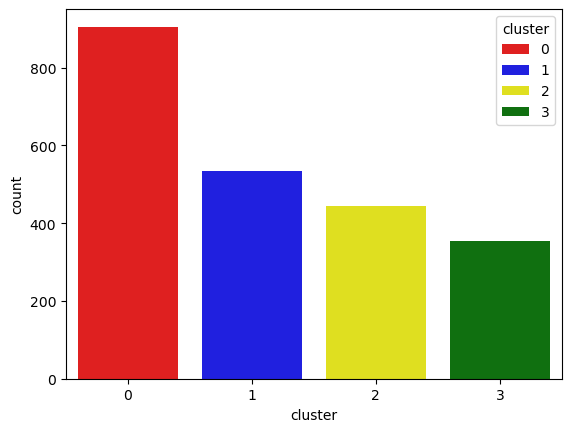

In [50]:
pal = ["red", "blue", "yellow", "green"]

sns.countplot(x=X["cluster"], palette=pal, hue=X["cluster"])

<Axes: xlabel='Total_Spending', ylabel='Income'>

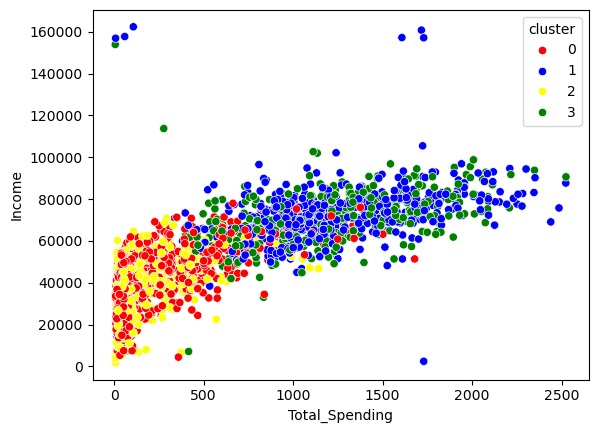

In [51]:
# Income & Spending patterns

sns.scatterplot(x=X["Total_Spending"], y=X["Income"], hue=X["cluster"], palette=pal)

In [52]:
# Cluster Summary

cluster_summary = X.groupby("cluster").mean()
print(cluster_summary)

               Income    Recency  NumDealsPurchases  NumWebPurchases  \
cluster                                                                
0        39680.580110  48.914917           2.594475         3.153591   
1        72808.445693  49.202247           1.958801         5.687266   
2        36960.143018  48.319820           2.594595         2.713964   
3        70722.681303  50.504249           1.855524         5.790368   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
cluster                                                                        
0                   0.969061           4.143646           6.307182  0.011050   
1                   5.498127           8.659176           3.580524  0.005618   
2                   0.837838           3.623874           6.659910  0.011261   
3                   5.014164           8.430595           3.728045  0.005666   

         Response        Age  Customer_tenure_days  Total_Spending  \
cluster         